# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score
from sklearn.preprocessing import OneHotEncoder

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# YOUR CODE HERE
df = pd.read_csv('data/adultData.csv')

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# YOUR CODE HERE
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [5]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print(df.info())

Number of rows: 32561
Number of columns: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32399 non-null  float64
 1   workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  int64  
 5   marital-status  32561 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex_selfID      32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32236 non-null  float64
 13  native-country  31978 non-null  object 
 14  income_binary   32561 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB
None


In [6]:
print(df.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32399.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.589216  1.897784e+05      10.080679    615.907773     87.303830   
std       13.647862  1.055500e+05       2.572720   2420.191974    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  14084.000000   4356.000000   

       hours-per-week  
count    32236.000000  
mean        40.450428  
std         12.353748  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


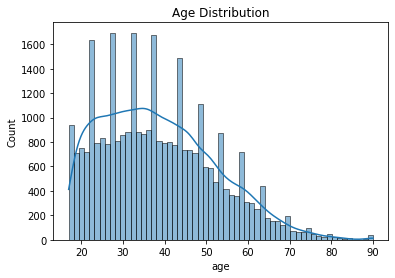

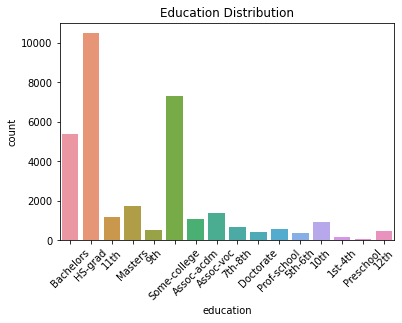

In [7]:
# Example: Histogram for age
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Example: Bar plot for education
sns.countplot(x='education', data=df)
plt.title('Education Distribution')
plt.xticks(rotation=45)
plt.show()


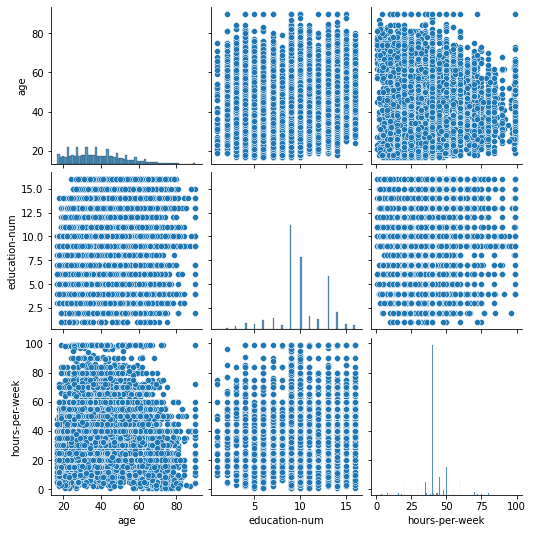

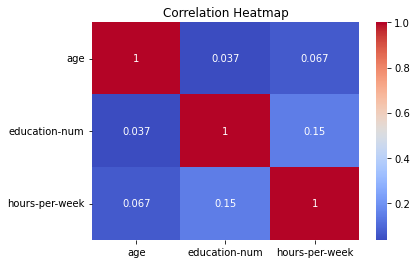

In [8]:
# Example: Pairplot of numeric variables
sns.pairplot(df[['age', 'education-num', 'hours-per-week']])
# Note, tired to use kind='kde' per advice from a TA, but it caused the cell to be unrunnable
plt.show()

# Heatmap of correlation between numeric variables
# we chose the features we thought would be the most insightful (ex: part time and full time work should make a significant change in pay class)
sns.heatmap(df[['age', 'education-num', 'hours-per-week']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


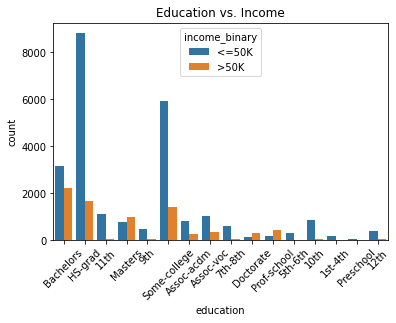

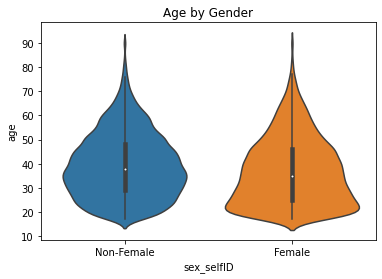

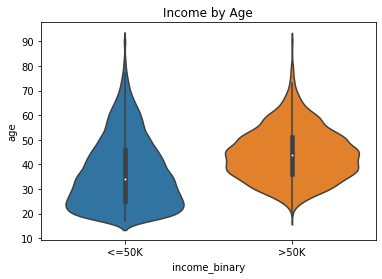

In [9]:
# Example: Stacked bar plot of education by income_binary
sns.countplot(x='education', hue='income_binary', data=df)
plt.title('Education vs. Income')
plt.xticks(rotation=45)
plt.show()

# Example: Violin plot of age by sex_selfID
sns.violinplot(x='sex_selfID', y='age', data=df)
plt.title('Age by Gender')
plt.show()

# Example: Violin plot of age by sex_selfID
sns.violinplot(x='income_binary', y='age', data=df)
plt.title('Income by Age')
plt.show()

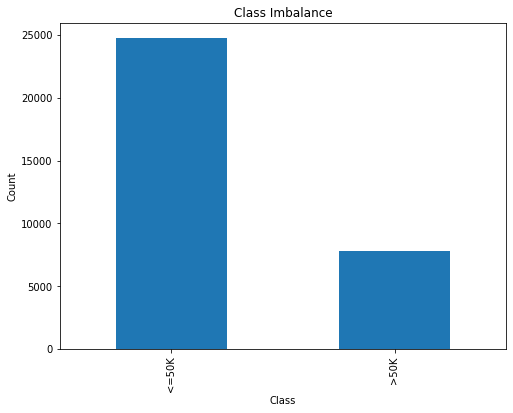

In [10]:
# Class imbalance:
class_counts = df['income_binary'].value_counts()
plt.figure(figsize = (8, 6))
class_counts.plot(kind='bar')
plt.title('Class Imbalance')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

# Data Prep
## Adressing Missingness
Here we address missingness by either replacing with median for numerical features or adding a new "not provided" category for categorical features

In [11]:
print("Missing values per column:")
print(df.isnull().sum())
print("Number of duplicate rows:", df.duplicated().sum())
print("Unique values in the 'workclass' column:", df['workclass'].unique())

Missing values per column:
age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64
Number of duplicate rows: 22
Unique values in the 'workclass' column: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [12]:
median_age = df['age'].median()

# Replace missing age values with the median
df['age'].fillna(median_age, inplace=True)

In [13]:
# confirm that there are no longer any missing from age
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64


In [14]:
# Replace missing values in the categorical columns with "Not provided"
df['workclass'].fillna("Not provided", inplace=True)
df['occupation'].fillna("Not provided", inplace=True)
df['native-country'].fillna("Not provided", inplace=True)

In [15]:
# confirm that there are no longer any missing from the categorical columns just addressed
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex_selfID          0
capital-gain        0
capital-loss        0
hours-per-week    325
native-country      0
income_binary       0
dtype: int64


In [16]:
median_hours = df['hours-per-week'].median()

# Replace missing age values with the median
df['hours-per-week'].fillna(median_hours, inplace=True)

In [17]:
# confirm that there are no longer any missing from hours-per week
# all columns should now have no missingness
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex_selfID        0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_binary     0
dtype: int64


Now that there is no missing values, we want to find and deal with outliers in the model

# Outliers
Here we attempt to replace the outlers with the median for numerical features.

In [18]:
# Define a function to replace outliers with the median
def replace_outliers_with_median(column):
    median_val = np.median(column)
    median_absolute_deviation = np.median(np.abs(column - median_val))
    threshold = 3.5 * median_absolute_deviation  # Adjust this threshold as needed
    column[column - median_val > threshold] = median_val
    column[median_val - column > threshold] = median_val
    return column

# Iterate through all columns in the DataFrame and replace outliers
for col in df.columns:
    if df[col].dtype != 'object':  # Exclude non-numeric columns
        df[col] = replace_outliers_with_median(df[col])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value

# One-hot encoding
Here we one hot encode our categorical features

In [19]:
# List of columns to one-hot encoded
categorical_columns = ['workclass', 'marital-status', 'occupation', 'native-country', 'education']

# Initialize an empty DataFrame to store the one-hot encoded data
one_hot_encoded_df = pd.DataFrame()
# Perform one-hot encoding on each column and concatenate the results
encoder = OneHotEncoder()
one_hot_encoded_array = encoder.fit_transform(df[categorical_columns])
temp_df = pd.DataFrame(one_hot_encoded_array.toarray(), columns=encoder.get_feature_names(categorical_columns), index=df.index)
one_hot_encoded_df = pd.concat([df, temp_df], axis=1)
one_hot_encoded_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
one_hot_encoded_df = one_hot_encoded_df.drop('workclass', axis=1)
one_hot_encoded_df = one_hot_encoded_df.drop('education', axis=1)
one_hot_encoded_df = one_hot_encoded_df.drop('marital-status', axis=1)
one_hot_encoded_df = one_hot_encoded_df.drop('occupation', axis=1)
one_hot_encoded_df = one_hot_encoded_df.drop('relationship', axis=1)
one_hot_encoded_df = one_hot_encoded_df.drop('race', axis=1)
one_hot_encoded_df = one_hot_encoded_df.drop('sex_selfID', axis=1)
one_hot_encoded_df = one_hot_encoded_df.drop('native-country', axis=1)
one_hot_encoded_df = one_hot_encoded_df.drop('income_binary', axis=1)

In [21]:
one_hot_encoded_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Not provided,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,39.0,77516,13,0,0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50.0,83311,13,0,0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.0,215646,9,0,0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,53.0,234721,7,0,0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28.0,338409,13,0,0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Training data
Here we set up the pipeline for the model

In [22]:
y = df['income_binary']
X = one_hot_encoded_df.drop('fnlwgt', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Logistic Regression Model fitting

In [23]:
clf = LogisticRegression(random_state=1234).fit(X, y)
clf.predict(X)
clf.predict_proba(X)
clf.score(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8328675409231904

# Model evaluation

In [24]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Accuracy " + str(accuracy))

Accuracy 0.8328675409231904


In [25]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)

[[22836  1884]
 [ 3558  4283]]


In [26]:
from sklearn.metrics import classification_report
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89     24720
        >50K       0.69      0.55      0.61      7841

    accuracy                           0.83     32561
   macro avg       0.78      0.74      0.75     32561
weighted avg       0.82      0.83      0.83     32561



In [27]:
from sklearn.preprocessing import LabelEncoder

# Convert labels to binary (0 and 1)
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
y_binary = np.where(y == '>50K', 1, 0)

# Calculate probability estimates for positive class
y_prob = clf.predict_proba(X)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_binary, y_prob)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_binary, y_prob)

print("ROC AUC:", roc_auc)

ROC AUC: 0.8802126373732959


In [29]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation
print(cv_scores)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.83033932 0.82478501 0.83323096 0.83584152 0.83707002]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
from sklearn.metrics import log_loss
logloss = log_loss(y, y_prob)
print(logloss)

0.3590518111549768


# Improve model
Use grid_search

In [31]:
from sklearn.model_selection import GridSearchCV
# Perform Grid Search with 5-fold cross-validation

# Define the parameter grid to search through
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X, y)

# Get the best estimator and its corresponding ROC AUC score
best_clf = grid_search.best_estimator_
best_roc_auc = grid_search.best_score_

# Predict and calculate ROC AUC using the best model
y_pred = best_clf.predict(X)
y_prob = best_clf.predict_proba(X)[:, 1]
roc_auc = roc_auc_score(y, y_prob)

print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC:", best_roc_auc)
print("ROC AUC (Best Model):", roc_auc)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best Parameters: {'C': 1}
Best ROC AUC: 0.8795654827338257
ROC AUC (Best Model): 0.8802126373732959


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Evaluate with other models

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=1234)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8070013818516812


In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=1234)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)

print("Gradient Boosting Accuracy:", gb_accuracy)

Gradient Boosting Accuracy: 0.8303393213572854


# Accounting for class imbalance

In [34]:
# Initialize Logistic Regression with class weights
clf = LogisticRegression(random_state=1234, class_weight='balanced').fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print accuracy score
y_pred = clf.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Accuracy " + str(accuracy))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy 0.7881821811369429


Although GBDT comes closes to the accuracy score of the LR model (only off in the hundreds of percentage), LR proved to perform with the best accuracy. Furthermore, Random Forest performed marginally worse than GBDT, and accounting for the class imbalance did much worse, less than 80% accuracy score in fact. The ROC-AUC of the best LR enhanced with GridSearch was very close (about 0.4% off) from that of the original LR run, so overall, it would appear that for the problem of predicting the income class of adults surveyed in the census based on demographic information provided, LR performed best with about 83.29% accuracy score. It is worth noting that the performance of the ensemble methods scored higher in accuracy for my partner, so it is possible this discrepency is due to some inherent randomness, since we ran with the same random states for all the models.